In [1]:
import gym
from gym import spaces
from maze_env import Maze
import numpy as np
import matplotlib.pyplot as plt

from stable_baselines.common.env_checker import check_env
from stable_baselines.bench import Monitor
from stable_baselines import DQN,A2C

/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [2]:
TK_SILENCE_DEPRECATION=1

In [3]:
class MazeGym(gym.Env):
    metadata = {'render.modes': ['human']}
    def __init__(self,task):
        self.first = 0
        self.agentXY = [0,0]
        self.goalXY = [4,4]
        walls,pits = self.mazeInfo(task)
        self.env = Maze(self.agentXY, self.goalXY, walls, pits)
        self.action_space = spaces.Discrete(4)
        self.observation_space = spaces.Box(low=5,high=395,shape=(4,))
        self.counter = 0
        self.max_steps = 300
        
    def mazeInfo(self, task):
        if task == 0:
            wall_shape=np.array([[2,2],[3,6]])
            pits=np.array([[6,3],[1,4]])
        elif task == 1:
            wall_shape=np.array([[6,2],[5,2],[4,2],[3,2],[2,2],[6,3],[6,4],[6,5],[2,3],[2,4],[2,5]])
            pits=[]
        elif task == 2:
            wall_shape=np.array([[6,3],[6,3],[6,2],[5,2],[4,2],[3,2],[3,3],[3,4],[3,5],[3,6],[4,6],[5,6],[5,7],[7,3]])
            pits=np.array([[1,3],[0,5], [7,7], [8,5]])
        return wall_shape, pits

    def step(self,action):
        self.counter += 1
        s_,r,d = self.env.step(action)
        if (self.counter == self.max_steps):
            self.counter = 0
            d = True
        return np.array(s_),r,d,{}

    def reset(self):
        state = np.array(self.env.reset(value=self.first))
        self.first = 1
        return state

    def render(self,mode='human'):
        self.env.render()

In [4]:
i = 0 # represents which task we will run
env = MazeGym(task=i)
env = Monitor(env=env, filename=None)
model = DQN('MlpPolicy', env, verbose=1) # pick your algorithm from stable baselines
rewards = []







Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where




In [5]:
env2 = MazeGym(task=i)
env2 = Monitor(env2, filename=None)
model2 = A2C('MlpPolicy', env2, verbose=1)
rewards2 = []

Wrapping the env in a DummyVecEnv.

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [6]:
while (len(rewards) < 2000):
    print("Length of Rewards for DQN: {}".format(len(rewards)))
    model.learn(total_timesteps=10000)
    rewards = env.get_episode_rewards()

while (len(rewards2) < 2000):
    print("Length of Rewards for A2C: {}".format(len(rewards2)))
    model2.learn(total_timesteps=10000)
    rewards2 = env2.get_episode_rewards()

Length of Rewards for DQN: 0
Length of Rewards for DQN: 50
Length of Rewards for DQN: 117
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 100      |
| mean 100 episode reward | -8.5     |
| steps                   | 7149     |
--------------------------------------
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 200      |
| mean 100 episode reward | 0.1      |
| steps                   | 7965     |
--------------------------------------
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 300      |
| mean 100 episode reward | -0.2     |
| steps                   | 9100     |
--------------------------------------
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 400      |
| mean 100 episode reward | 0.3      |
| steps                   | 9912     |
-------------

---------------------------------
| ep_len_mean        | 80       |
| ep_reward_mean     | -14.2    |
| explained_variance | -0.138   |
| fps                | 303      |
| nupdates           | 1200     |
| policy_entropy     | 1.37     |
| total_timesteps    | 6000     |
| value_loss         | 86.2     |
---------------------------------
---------------------------------
| ep_len_mean        | 77.4     |
| ep_reward_mean     | -14      |
| explained_variance | -654     |
| fps                | 299      |
| nupdates           | 1300     |
| policy_entropy     | 1.27     |
| total_timesteps    | 6500     |
| value_loss         | 7.49e-07 |
---------------------------------
---------------------------------
| ep_len_mean        | 80.4     |
| ep_reward_mean     | -14.2    |
| explained_variance | -3.23    |
| fps                | 308      |
| nupdates           | 1400     |
| policy_entropy     | 1.28     |
| total_timesteps    | 7000     |
| value_loss         | 1.56e-06 |
--------------

----------------------------------
| ep_len_mean        | 78.4      |
| ep_reward_mean     | -15.1     |
| explained_variance | -5.36e-05 |
| fps                | 301       |
| nupdates           | 1500      |
| policy_entropy     | 1.26      |
| total_timesteps    | 7500      |
| value_loss         | 5e-06     |
----------------------------------
---------------------------------
| ep_len_mean        | 78       |
| ep_reward_mean     | -15      |
| explained_variance | 4.68e-05 |
| fps                | 304      |
| nupdates           | 1600     |
| policy_entropy     | 1.31     |
| total_timesteps    | 8000     |
| value_loss         | 94.1     |
---------------------------------
---------------------------------
| ep_len_mean        | 77       |
| ep_reward_mean     | -15.1    |
| explained_variance | -119     |
| fps                | 305      |
| nupdates           | 1700     |
| policy_entropy     | 1.32     |
| total_timesteps    | 8500     |
| value_loss         | 0.00194  |
----

---------------------------------
| ep_len_mean        | 93       |
| ep_reward_mean     | -15.8    |
| explained_variance | -60.9    |
| fps                | 351      |
| nupdates           | 1800     |
| policy_entropy     | 1.36     |
| total_timesteps    | 9000     |
| value_loss         | 6.45e-05 |
---------------------------------
----------------------------------
| ep_len_mean        | 91        |
| ep_reward_mean     | -15.7     |
| explained_variance | -2.15e+03 |
| fps                | 349       |
| nupdates           | 1900      |
| policy_entropy     | 1.32      |
| total_timesteps    | 9500      |
| value_loss         | 0.000341  |
----------------------------------
---------------------------------
| ep_len_mean        | 87       |
| ep_reward_mean     | -15.5    |
| explained_variance | 0.0277   |
| fps                | 345      |
| nupdates           | 2000     |
| policy_entropy     | 1.37     |
| total_timesteps    | 10000    |
| value_loss         | 95.7     |
----

Length of Rewards for A2C: 482
---------------------------------
| ep_len_mean        | 66.7     |
| ep_reward_mean     | -14.6    |
| explained_variance | 0.411    |
| fps                | 1242     |
| nupdates           | 1        |
| policy_entropy     | 1.35     |
| total_timesteps    | 5        |
| value_loss         | 1.18e-07 |
---------------------------------
---------------------------------
| ep_len_mean        | 65.5     |
| ep_reward_mean     | -14.5    |
| explained_variance | 0.0059   |
| fps                | 318      |
| nupdates           | 100      |
| policy_entropy     | 1.32     |
| total_timesteps    | 500      |
| value_loss         | 94.8     |
---------------------------------
---------------------------------
| ep_len_mean        | 62.8     |
| ep_reward_mean     | -14.4    |
| explained_variance | -6.09    |
| fps                | 285      |
| nupdates           | 200      |
| policy_entropy     | 1.32     |
| total_timesteps    | 1000     |
| value_loss     

---------------------------------
| ep_len_mean        | 121      |
| ep_reward_mean     | -17.9    |
| explained_variance | 0.0346   |
| fps                | 459      |
| nupdates           | 300      |
| policy_entropy     | 1.37     |
| total_timesteps    | 1500     |
| value_loss         | 4.85e-06 |
---------------------------------
---------------------------------
| ep_len_mean        | 122      |
| ep_reward_mean     | -17.8    |
| explained_variance | 0.0274   |
| fps                | 428      |
| nupdates           | 400      |
| policy_entropy     | 1.27     |
| total_timesteps    | 2000     |
| value_loss         | 1.82e-06 |
---------------------------------
---------------------------------
| ep_len_mean        | 126      |
| ep_reward_mean     | -18.1    |
| explained_variance | 0.00185  |
| fps                | 428      |
| nupdates           | 500      |
| policy_entropy     | 1.38     |
| total_timesteps    | 2500     |
| value_loss         | 94       |
--------------

---------------------------------
| ep_len_mean        | 102      |
| ep_reward_mean     | -16.5    |
| explained_variance | -0.0663  |
| fps                | 363      |
| nupdates           | 600      |
| policy_entropy     | 1.32     |
| total_timesteps    | 3000     |
| value_loss         | 94.1     |
---------------------------------
---------------------------------
| ep_len_mean        | 102      |
| ep_reward_mean     | -16.6    |
| explained_variance | 0.279    |
| fps                | 372      |
| nupdates           | 700      |
| policy_entropy     | 1.33     |
| total_timesteps    | 3500     |
| value_loss         | 1.29e-05 |
---------------------------------
---------------------------------
| ep_len_mean        | 102      |
| ep_reward_mean     | -16.5    |
| explained_variance | -0.226   |
| fps                | 386      |
| nupdates           | 800      |
| policy_entropy     | 1.33     |
| total_timesteps    | 4000     |
| value_loss         | 0.00169  |
--------------

---------------------------------
| ep_len_mean        | 111      |
| ep_reward_mean     | -17.2    |
| explained_variance | -11.2    |
| fps                | 384      |
| nupdates           | 900      |
| policy_entropy     | 1.34     |
| total_timesteps    | 4500     |
| value_loss         | 0.000186 |
---------------------------------
---------------------------------
| ep_len_mean        | 110      |
| ep_reward_mean     | -17.2    |
| explained_variance | 3.3e-05  |
| fps                | 389      |
| nupdates           | 1000     |
| policy_entropy     | 1.38     |
| total_timesteps    | 5000     |
| value_loss         | 93.6     |
---------------------------------
---------------------------------
| ep_len_mean        | 110      |
| ep_reward_mean     | -17.1    |
| explained_variance | 0.0682   |
| fps                | 405      |
| nupdates           | 1100     |
| policy_entropy     | 1.38     |
| total_timesteps    | 5500     |
| value_loss         | 5.02e-07 |
--------------

---------------------------------
| ep_len_mean        | 123      |
| ep_reward_mean     | -18      |
| explained_variance | -16.2    |
| fps                | 475      |
| nupdates           | 1200     |
| policy_entropy     | 1.34     |
| total_timesteps    | 6000     |
| value_loss         | 3.38e-06 |
---------------------------------
----------------------------------
| ep_len_mean        | 125       |
| ep_reward_mean     | -18.1     |
| explained_variance | -1.37e+03 |
| fps                | 481       |
| nupdates           | 1300      |
| policy_entropy     | 1.36      |
| total_timesteps    | 6500      |
| value_loss         | 7.23e-05  |
----------------------------------
---------------------------------
| ep_len_mean        | 122      |
| ep_reward_mean     | -17.9    |
| explained_variance | -0.00867 |
| fps                | 472      |
| nupdates           | 1400     |
| policy_entropy     | 1.38     |
| total_timesteps    | 7000     |
| value_loss         | 94.9     |
----

---------------------------------
| ep_len_mean        | 105      |
| ep_reward_mean     | -16.9    |
| explained_variance | -0.0162  |
| fps                | 384      |
| nupdates           | 1500     |
| policy_entropy     | 1.23     |
| total_timesteps    | 7500     |
| value_loss         | 93.8     |
---------------------------------
---------------------------------
| ep_len_mean        | 103      |
| ep_reward_mean     | -16.8    |
| explained_variance | -992     |
| fps                | 390      |
| nupdates           | 1600     |
| policy_entropy     | 1.33     |
| total_timesteps    | 8000     |
| value_loss         | 1.18e-05 |
---------------------------------
---------------------------------
| ep_len_mean        | 99.5     |
| ep_reward_mean     | -16.5    |
| explained_variance | -1.07    |
| fps                | 378      |
| nupdates           | 1700     |
| policy_entropy     | 1.38     |
| total_timesteps    | 8500     |
| value_loss         | 5.89e-05 |
--------------

---------------------------------
| ep_len_mean        | 111      |
| ep_reward_mean     | -17.2    |
| explained_variance | 0.00988  |
| fps                | 430      |
| nupdates           | 1900     |
| policy_entropy     | 1.37     |
| total_timesteps    | 9500     |
| value_loss         | 93.9     |
---------------------------------
----------------------------------
| ep_len_mean        | 113       |
| ep_reward_mean     | -17.4     |
| explained_variance | -1.14e+05 |
| fps                | 430       |
| nupdates           | 2000      |
| policy_entropy     | 1.35      |
| total_timesteps    | 10000     |
| value_loss         | 0.000174  |
----------------------------------
Length of Rewards for A2C: 1100
---------------------------------
| ep_len_mean        | 114      |
| ep_reward_mean     | -17.4    |
| explained_variance | 0.529    |
| fps                | 24       |
| nupdates           | 1        |
| policy_entropy     | 1.34     |
| total_timesteps    | 5        |
| valu

---------------------------------
| ep_len_mean        | 81.6     |
| ep_reward_mean     | -15.5    |
| explained_variance | -308     |
| fps                | 377      |
| nupdates           | 100      |
| policy_entropy     | 1.33     |
| total_timesteps    | 500      |
| value_loss         | 8.3e-05  |
---------------------------------
---------------------------------
| ep_len_mean        | 78.1     |
| ep_reward_mean     | -15.1    |
| explained_variance | -1.81    |
| fps                | 445      |
| nupdates           | 200      |
| policy_entropy     | 1.34     |
| total_timesteps    | 1000     |
| value_loss         | 1.42e-05 |
---------------------------------
---------------------------------
| ep_len_mean        | 81       |
| ep_reward_mean     | -15.4    |
| explained_variance | -0.00301 |
| fps                | 474      |
| nupdates           | 300      |
| policy_entropy     | 1.36     |
| total_timesteps    | 1500     |
| value_loss         | 94       |
--------------

---------------------------------
| ep_len_mean        | 141      |
| ep_reward_mean     | -19.4    |
| explained_variance | -0.0666  |
| fps                | 508      |
| nupdates           | 400      |
| policy_entropy     | 1.31     |
| total_timesteps    | 2000     |
| value_loss         | 95.6     |
---------------------------------
----------------------------------
| ep_len_mean        | 138       |
| ep_reward_mean     | -19.2     |
| explained_variance | -6.16e+04 |
| fps                | 510       |
| nupdates           | 500       |
| policy_entropy     | 1.37      |
| total_timesteps    | 2500      |
| value_loss         | 1.4e-05   |
----------------------------------
---------------------------------
| ep_len_mean        | 138      |
| ep_reward_mean     | -19.2    |
| explained_variance | -11.2    |
| fps                | 514      |
| nupdates           | 600      |
| policy_entropy     | 1.28     |
| total_timesteps    | 3000     |
| value_loss         | 5.83e-05 |
----

---------------------------------
| ep_len_mean        | 118      |
| ep_reward_mean     | -17.9    |
| explained_variance | -0.0271  |
| fps                | 330      |
| nupdates           | 700      |
| policy_entropy     | 1.36     |
| total_timesteps    | 3500     |
| value_loss         | 0.00163  |
---------------------------------
---------------------------------
| ep_len_mean        | 114      |
| ep_reward_mean     | -17.6    |
| explained_variance | 0.038    |
| fps                | 324      |
| nupdates           | 800      |
| policy_entropy     | 1.32     |
| total_timesteps    | 4000     |
| value_loss         | 94.6     |
---------------------------------
---------------------------------
| ep_len_mean        | 103      |
| ep_reward_mean     | -16.8    |
| explained_variance | -58.7    |
| fps                | 306      |
| nupdates           | 900      |
| policy_entropy     | 1.38     |
| total_timesteps    | 4500     |
| value_loss         | 3.37e-05 |
--------------

---------------------------------
| ep_len_mean        | 118      |
| ep_reward_mean     | -17.7    |
| explained_variance | -143     |
| fps                | 478      |
| nupdates           | 1000     |
| policy_entropy     | 1.35     |
| total_timesteps    | 5000     |
| value_loss         | 0.00016  |
---------------------------------
---------------------------------
| ep_len_mean        | 120      |
| ep_reward_mean     | -18      |
| explained_variance | 0.636    |
| fps                | 475      |
| nupdates           | 1100     |
| policy_entropy     | 1.31     |
| total_timesteps    | 5500     |
| value_loss         | 1.04e-05 |
---------------------------------
---------------------------------
| ep_len_mean        | 123      |
| ep_reward_mean     | -18.2    |
| explained_variance | -0.0213  |
| fps                | 473      |
| nupdates           | 1200     |
| policy_entropy     | 1.21     |
| total_timesteps    | 6000     |
| value_loss         | 94.4     |
--------------

---------------------------------
| ep_len_mean        | 132      |
| ep_reward_mean     | -18.7    |
| explained_variance | 0.00862  |
| fps                | 436      |
| nupdates           | 1300     |
| policy_entropy     | 1.35     |
| total_timesteps    | 6500     |
| value_loss         | 94       |
---------------------------------
---------------------------------
| ep_len_mean        | 128      |
| ep_reward_mean     | -18.3    |
| explained_variance | 0.0424   |
| fps                | 436      |
| nupdates           | 1400     |
| policy_entropy     | 1.39     |
| total_timesteps    | 7000     |
| value_loss         | 1.19e-08 |
---------------------------------
---------------------------------
| ep_len_mean        | 123      |
| ep_reward_mean     | -18      |
| explained_variance | -0.0204  |
| fps                | 437      |
| nupdates           | 1500     |
| policy_entropy     | 1.36     |
| total_timesteps    | 7500     |
| value_loss         | 1.63e-05 |
--------------

---------------------------------
| ep_len_mean        | 135      |
| ep_reward_mean     | -19      |
| explained_variance | 0.00047  |
| fps                | 507      |
| nupdates           | 1600     |
| policy_entropy     | 1.32     |
| total_timesteps    | 8000     |
| value_loss         | 7.3e-06  |
---------------------------------
---------------------------------
| ep_len_mean        | 135      |
| ep_reward_mean     | -19      |
| explained_variance | 0.00343  |
| fps                | 503      |
| nupdates           | 1700     |
| policy_entropy     | 1.34     |
| total_timesteps    | 8500     |
| value_loss         | 94.3     |
---------------------------------
---------------------------------
| ep_len_mean        | 138      |
| ep_reward_mean     | -19.2    |
| explained_variance | -135     |
| fps                | 510      |
| nupdates           | 1800     |
| policy_entropy     | 1.35     |
| total_timesteps    | 9000     |
| value_loss         | 0.000167 |
--------------

---------------------------------
| ep_len_mean        | 144      |
| ep_reward_mean     | -19.7    |
| explained_variance | -23.4    |
| fps                | 483      |
| nupdates           | 2000     |
| policy_entropy     | 1.36     |
| total_timesteps    | 10000    |
| value_loss         | 0.000194 |
---------------------------------
Length of Rewards for A2C: 1743
---------------------------------
| ep_len_mean        | 144      |
| ep_reward_mean     | -19.7    |
| explained_variance | -0.0256  |
| fps                | 1583     |
| nupdates           | 1        |
| policy_entropy     | 1.25     |
| total_timesteps    | 5        |
| value_loss         | 0.0141   |
---------------------------------
---------------------------------
| ep_len_mean        | 142      |
| ep_reward_mean     | -19.5    |
| explained_variance | 0.00488  |
| fps                | 329      |
| nupdates           | 100      |
| policy_entropy     | 1.25     |
| total_timesteps    | 500      |
| value_loss    

---------------------------------
| ep_len_mean        | 90       |
| ep_reward_mean     | -16      |
| explained_variance | 8.23e-06 |
| fps                | 303      |
| nupdates           | 200      |
| policy_entropy     | 1.36     |
| total_timesteps    | 1000     |
| value_loss         | 93.8     |
---------------------------------
----------------------------------
| ep_len_mean        | 87.9      |
| ep_reward_mean     | -15.9     |
| explained_variance | -8.91e+04 |
| fps                | 297       |
| nupdates           | 300       |
| policy_entropy     | 1.37      |
| total_timesteps    | 1500      |
| value_loss         | 3.21e-05  |
----------------------------------
---------------------------------
| ep_len_mean        | 82.7     |
| ep_reward_mean     | -15.5    |
| explained_variance | -0.318   |
| fps                | 304      |
| nupdates           | 400      |
| policy_entropy     | 1.35     |
| total_timesteps    | 2000     |
| value_loss         | 2.75e-05 |
----

---------------------------------
| ep_len_mean        | 104      |
| ep_reward_mean     | -16.9    |
| explained_variance | 0.00572  |
| fps                | 362      |
| nupdates           | 500      |
| policy_entropy     | 1.34     |
| total_timesteps    | 2500     |
| value_loss         | 1.1e-05  |
---------------------------------
---------------------------------
| ep_len_mean        | 108      |
| ep_reward_mean     | -17.1    |
| explained_variance | -0.0272  |
| fps                | 366      |
| nupdates           | 600      |
| policy_entropy     | 1.28     |
| total_timesteps    | 3000     |
| value_loss         | 94.5     |
---------------------------------
----------------------------------
| ep_len_mean        | 99        |
| ep_reward_mean     | -16.6     |
| explained_variance | -5.11e+03 |
| fps                | 332       |
| nupdates           | 700       |
| policy_entropy     | 1.26      |
| total_timesteps    | 3500      |
| value_loss         | 3.88e-05  |
-----

In [7]:
rewards = rewards[:2000]
rewards2 = rewards2[:2000]
episodes = len(rewards)

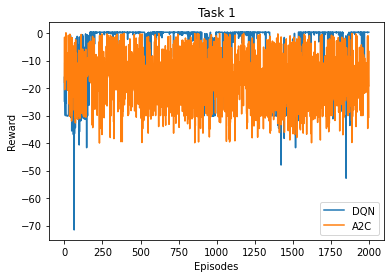

In [8]:
plt.xlabel("Episodes")
plt.ylabel("Reward")
plt.title("Task {}".format(i+1))
plt.plot(list(range(episodes)),rewards, label='DQN')
plt.plot(list(range(episodes)),rewards2, label='A2C')
plt.legend()
plt.savefig("Task 1 A4")

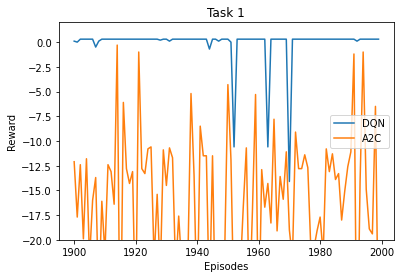

In [9]:
plt.xlabel("Episodes")
plt.ylabel("Reward")
plt.title("Task {}".format(i+1))
plt.plot(list(range(episodes)[1900:]),rewards[1900:], label='DQN')
plt.plot(list(range(episodes)[1900:]),rewards2[1900:], label='A2C')
plt.ylim(bottom=-20,top=2)
plt.legend()
plt.savefig("Task 1 A4 Last 100")

In [10]:
print(max(rewards))
print(max(rewards2))

0.30000000000000004
0.10000000000000009


In [11]:
print(np.var(rewards[1900:]))
print(np.var(rewards2[1900:]))

4.312490999999997
53.102419000000324
